In [149]:
import numpy as np
import pandas as pd

In [108]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [110]:
df.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [111]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [112]:
df["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [113]:
df["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [114]:
df.shape

(100000, 9)

In [115]:
df["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

<Axes: xlabel='diabetes'>

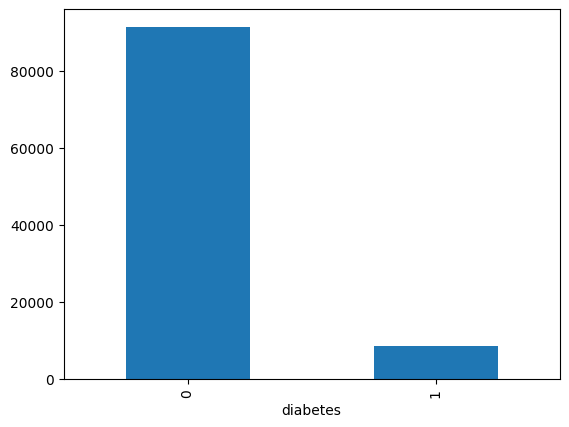

In [116]:
df["diabetes"].value_counts().plot(kind ="bar")

In [117]:
df["blood_glucose_level"].value_counts()

blood_glucose_level
130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: count, dtype: int64

In [118]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [119]:
X = df.drop("diabetes",axis=1)
y = df["diabetes"]

In [120]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape , X_test.shape

((80000, 8), (20000, 8))

In [121]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape , X_test.shape

((80000, 8), (20000, 8))

In [122]:
tf = ColumnTransformer(
    transformers=[
        ("tf1",OrdinalEncoder(categories=[["Male","Female","Other"]]),["gender"]),
        ("tf2",OneHotEncoder(drop="first",sparse_output=False),["smoking_history"])
    ],
    remainder="passthrough"
)

In [123]:
tf

,transformers,"[('tf1', ...), ('tf2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,"[['Male', 'Female', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [124]:
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.fit_transform(X_test)

In [125]:
# X_train_tf = pd.DataFrame(X_train_tf,columns=tf.get_feature_names_out())

In [126]:
# X_train_tf.head()

# Applying SMOTE

In [127]:
from imblearn.over_sampling import SMOTE

In [128]:
smote = SMOTE()

X_smote , y_smote = smote.fit_resample(X_train_tf , y_train)

y_smote.value_counts()

diabetes
0    73208
1    73208
Name: count, dtype: int64

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [130]:
rfc = RandomForestClassifier()

rfc.fit(X_smote , y_smote)

y_pred_rfc = rfc.predict(X_test_tf)

y_pred_rfc.shape

(20000,)

In [131]:
lg = LogisticRegression(max_iter=2000)

lg.fit(X_smote , y_smote)

y_pred_lg = lg.predict(X_test_tf)
y_pred_lg

array([0, 0, 0, ..., 0, 1, 0], shape=(20000,))

In [132]:
y_pred_lg.shape

(20000,)

In [133]:
y_train.shape

(80000,)

# Accuracy

## Logistic Regression

In [134]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

#calculate confusion matrix
print("\nConfusion matrix.\n")
cm = confusion_matrix(y_test,y_pred_lg)
print(cm)

#calculate classification report
print("\nClassification report.\n")
cr = classification_report(y_test,y_pred_lg)
print(cr)

#calcuate accuracy score
print("\nAccuracy score.\n")
a_score = accuracy_score(y_test,y_pred_lg)
print(a_score)

#calculate f1 score
print("\nf1 score.\n")
f_score = f1_score(y_test,y_pred_lg)
print(f_score)



Confusion matrix.

[[16319  1973]
 [  209  1499]]

Classification report.

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18292
           1       0.43      0.88      0.58      1708

    accuracy                           0.89     20000
   macro avg       0.71      0.88      0.76     20000
weighted avg       0.94      0.89      0.91     20000


Accuracy score.

0.8909

f1 score.

0.5787644787644788


## Random forest classifier 

In [135]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

#calculate confusion matrix
print("\nConfusion matrix.\n")
cm = confusion_matrix(y_test,y_pred_rfc)
print(cm)

#calculate classification report
print("\nClassification report.\n")
cr = classification_report(y_test,y_pred_rfc)
print(cr)

#calcuate accuracy score
print("\nAccuracy score.\n")
a_score = accuracy_score(y_test,y_pred_rfc)
print(a_score)

#calculate f1 score
print("\nf1 score.\n")
f_score = f1_score(y_test,y_pred_rfc)
print(f_score)



Confusion matrix.

[[18157   135]
 [  505  1203]]

Classification report.

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.90      0.70      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.94      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Accuracy score.

0.968

f1 score.

0.7898883782009193


In [156]:
# Get the input data as a 2D array
inputs_1 = X_test_tf[[6]]

# Predict with the model
prediction = lg.predict(inputs_1)
print("Actual Class :", y_test.iloc[6])
print("Predicted Class:", prediction[0])

Actual Class : 0
Predicted Class: 0


diabetes
0    18292
1     1708
Name: count, dtype: int64

In [163]:
def prediction(user_input,tf):
    
    #Convert dictionary to a single frame dataset
    user_df = pd.DataFrame([user_input])

    user_df = user_df[X.columns]

    #Transform using the fitted transformer
    user_tf = tf.transform(user_df)

    return user_tf

In [164]:
user_input = {
    "gender": "Female",
    "age":44.0,
    "hypertension": 0,
    "heart_disease": 0,
    "smoking_history": "never",
    "bmi": 19.5,
    "HbA1c_level": 6.5,
    "blood_glucose_level":200
   
}
result = prediction(user_input,tf)

prediction = rfc.predict(result)
print(prediction[0])

0


In [136]:
import pickle

pickle.dump(lg,open("diabetesModelLogisticRegression.pkl","wb"))

pickle.dump(lg,open("diabetesModelRandomForestClassifier.pkl","wb"))

pickle.dump(tf,open("diabetesTransformer.pkl","wb"))